# Multivariate EBNM based prior for M&M

Running the [mixture prior pipeline](https://github.com/cumc/bioworkflows/blob/master/multivariate-fine-mapping/mixture_prior.ipynb) with [this notebook](20210224_MNM_Benchmark).

In [2]:
%cd ~/GIT/github/mvarbvs/data

/home/gw/GIT/github/mvarbvs/data

## Data-driven prior via ED

In [4]:
dat = readRDS('prior_simulation.rds')

For the [artifically simulated mixture](20200402_create_prior_mixture.html#Artificial-structure),

In [5]:
a1 = dat$artificial_mixture_50$ED

In [6]:
names(a1)

[1] "U"      "w"      "loglik"

In [7]:
a1$loglik[length(a1$loglik)]

[1] -116.3448

In [26]:
tmp = data.frame(names(a1$U), a1$w)
tmp [order(tmp[,2], decreasing = T),]

,names.a1.U.,a1.w
,<fct>,<dbl>
1,XtX,0.334909810
2,tFLASH_udv_si,0.253739418
55,tFLASH_nonneg,0.172666784
5,FLASH_udv_si_3,0.079225331
3,FLASH_udv_si_1,0.026459501
58,FLASH_nonneg_3,0.012434996
63,tPCA,0.006999041
26,FLASH_udv_si_24,0.005911104
31,FLASH_udv_si_29,0.005334265


In [27]:
tol = 1E-16

In [28]:
comp = names(a1$U)[which(a1$w>tol)]
print(comp)
print(length(comp))

 [1] "XtX"             "tFLASH_udv_si"   "FLASH_udv_si_1"  "FLASH_udv_si_3" 
 [5] "FLASH_udv_si_4"  "FLASH_udv_si_7"  "FLASH_udv_si_9"  "FLASH_udv_si_11"
 [9] "FLASH_udv_si_13" "FLASH_udv_si_18" "FLASH_udv_si_22" "FLASH_udv_si_23"
[13] "FLASH_udv_si_24" "FLASH_udv_si_25" "FLASH_udv_si_26" "FLASH_udv_si_29"
[17] "FLASH_udv_si_30" "FLASH_udv_si_31" "FLASH_udv_si_32" "FLASH_udv_si_33"
[21] "FLASH_udv_si_34" "FLASH_udv_si_36" "FLASH_udv_si_37" "FLASH_udv_si_38"
[25] "FLASH_udv_si_39" "FLASH_udv_si_40" "FLASH_udv_si_41" "FLASH_udv_si_42"
[29] "FLASH_udv_si_43" "FLASH_udv_si_46" "FLASH_udv_si_52" "tFLASH_nonneg"  
[33] "FLASH_nonneg_1"  "FLASH_nonneg_3"  "PCA_1"           "tPCA"           
[1] 36


The component with strongest weight is `tFLASH`.

In [30]:
plot_sharing = function(X) {
clrs <- colorRampPalette(rev(c("#D73027","#FC8D59","#FEE090","#FFFFBF",
                               "#E0F3F8","#91BFDB","#4575B4")))(64)
lat <- cov2cor(X)
lat[lower.tri(lat)] <- NA
n <- nrow(lat)
print(lattice::levelplot(lat[n:1,],col.regions = clrs,xlab = "",ylab = "",
                colorkey = TRUE,at = seq(0,1,length.out = 64),
                scales = list(cex = 0.6,x = list(rot = 45))))
}

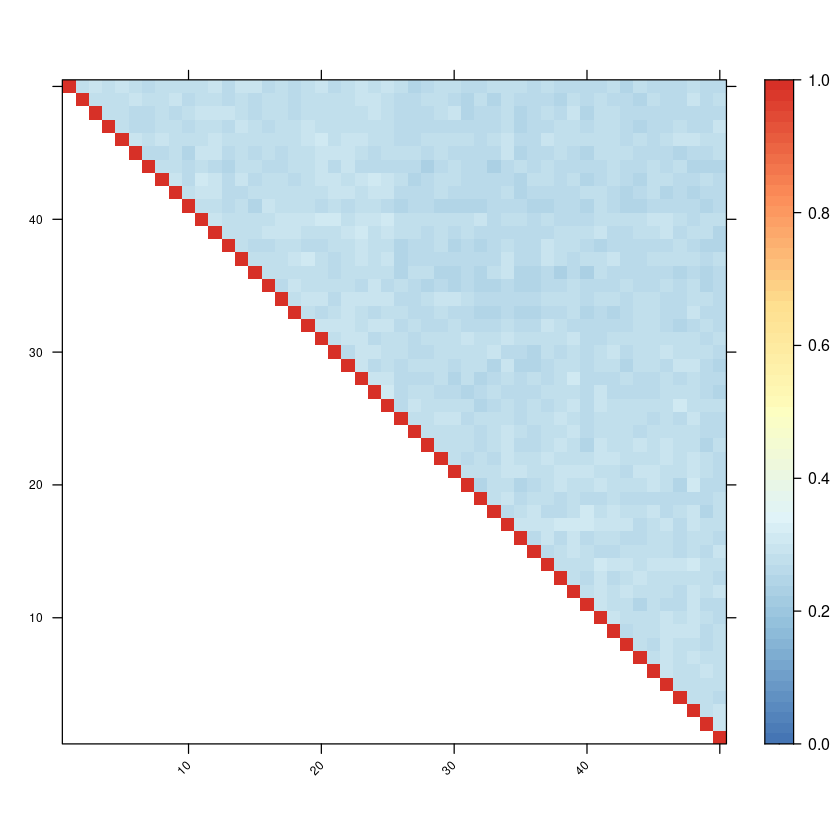

In [31]:
plot_sharing(a1$U$XtX)

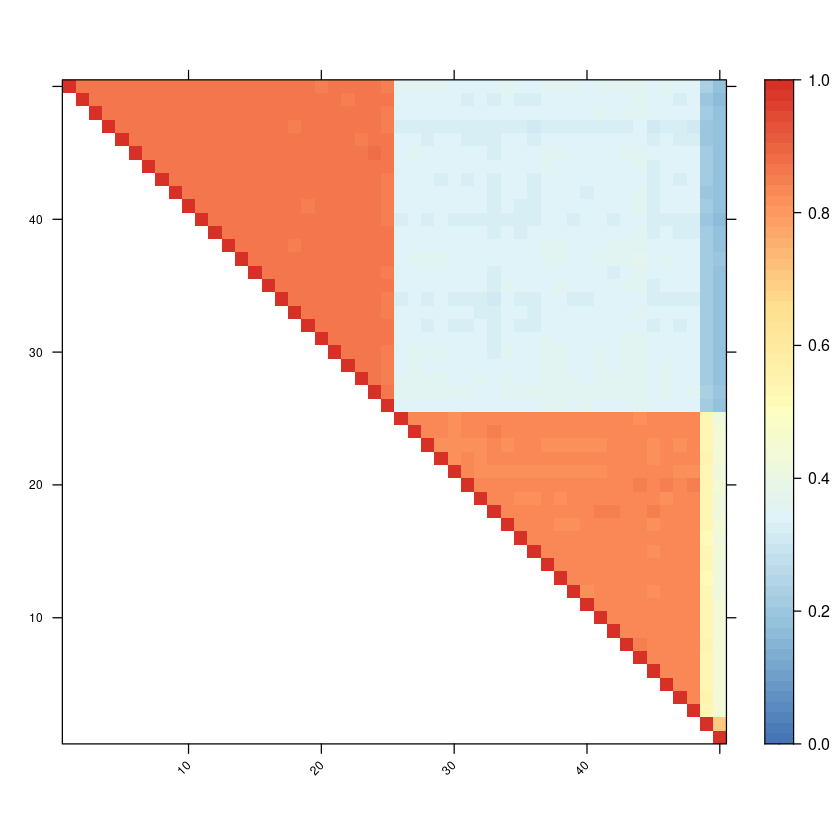

In [32]:
plot_sharing(a1$U$tFLASH_udv_si)

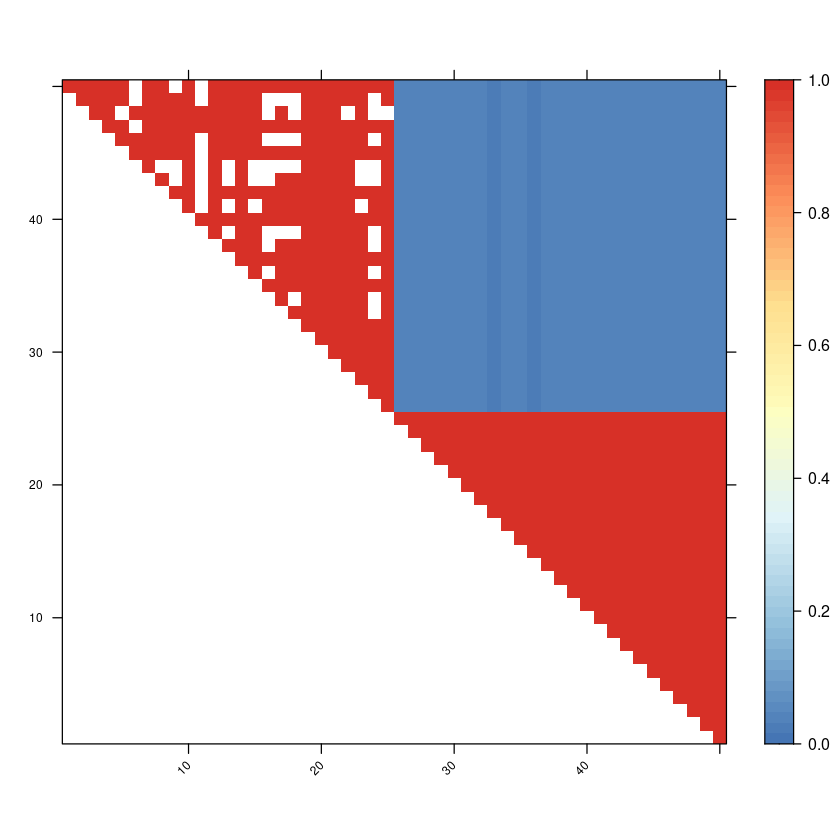

In [33]:
plot_sharing(a1$U$tFLASH_nonneg)

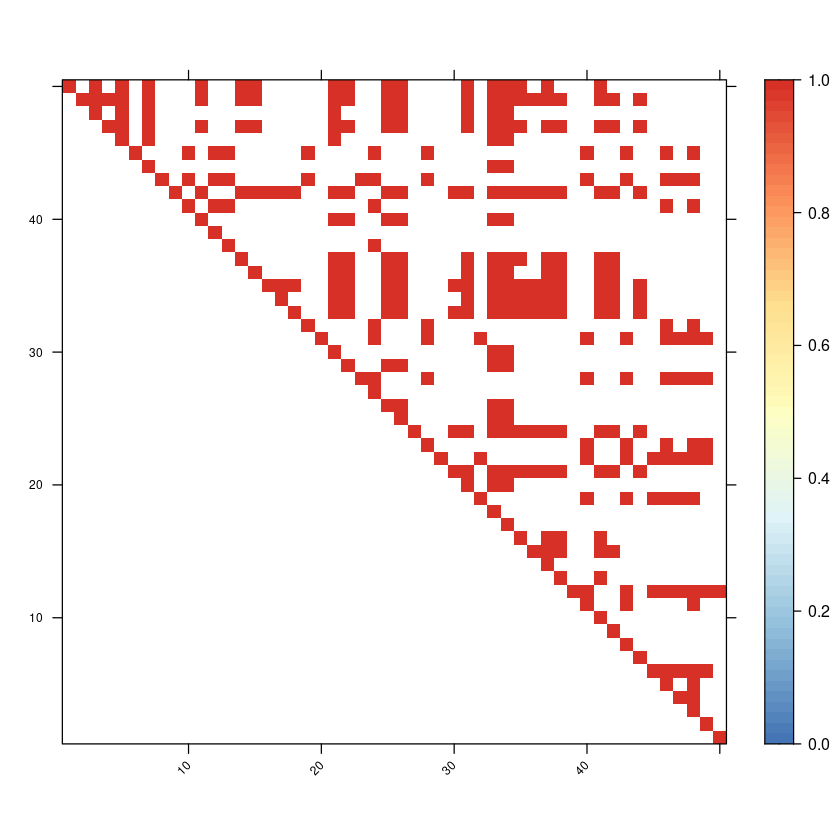

In [34]:
plot_sharing(a1$U$FLASH_udv_si_3)

For mixture simulated based on GTEx V8 ED matrices,

In [35]:
g1 = dat$gtex_mixture$ED

In [36]:
g1$loglik[length(g1$loglik)]

[1] -116.7058

In [37]:
g1$w

[1]  8.337228e-01  1.194998e-01  1.958799e-22 3.787088e-252  0.000000e+00
 [6] 8.991874e-294 2.570089e-272  0.000000e+00 4.256807e-297  0.000000e+00
[11]  0.000000e+00 1.520305e-307 1.694938e-293  0.000000e+00 2.623382e-221
[16]  0.000000e+00 4.490986e-308  0.000000e+00  0.000000e+00 3.923427e-302
[21] 7.264064e-259  6.037829e-04 2.089639e-106  2.348158e-02  2.516042e-23
[26] 1.363651e-201  3.632964e-03  0.000000e+00 3.357850e-146  7.507091e-05
[31]  2.378822e-03  8.567518e-04  5.453433e-04  0.000000e+00  2.489167e-04
[36] 1.760527e-312 9.201158e-263  2.060441e-03  5.165669e-03 2.749025e-309
[41] 7.139088e-199  2.753795e-03  2.022925e-03  0.000000e+00  1.178001e-03
[46]  1.323778e-15 1.336357e-243 1.694760e-302  1.773424e-03

In [39]:
names(g1$U)[which(g1$w>tol)]
g1$w[which(g1$w>tol)]

[1] "XtX"             "tFLASH_udv_si"   "FLASH_udv_si_20" "tFLASH_nonneg"  
 [5] "FLASH_nonneg_3"  "FLASH_nonneg_6"  "FLASH_nonneg_7"  "FLASH_nonneg_8" 
 [9] "FLASH_nonneg_9"  "FLASH_nonneg_11" "FLASH_nonneg_14" "FLASH_nonneg_15"
[13] "FLASH_nonneg_18" "FLASH_nonneg_19" "FLASH_nonneg_21" "PCA_1"          
[17] "tPCA"

[1] 8.337228e-01 1.194998e-01 6.037829e-04 2.348158e-02 3.632964e-03
 [6] 7.507091e-05 2.378822e-03 8.567518e-04 5.453433e-04 2.489167e-04
[11] 2.060441e-03 5.165669e-03 2.753795e-03 2.022925e-03 1.178001e-03
[16] 1.323778e-15 1.773424e-03

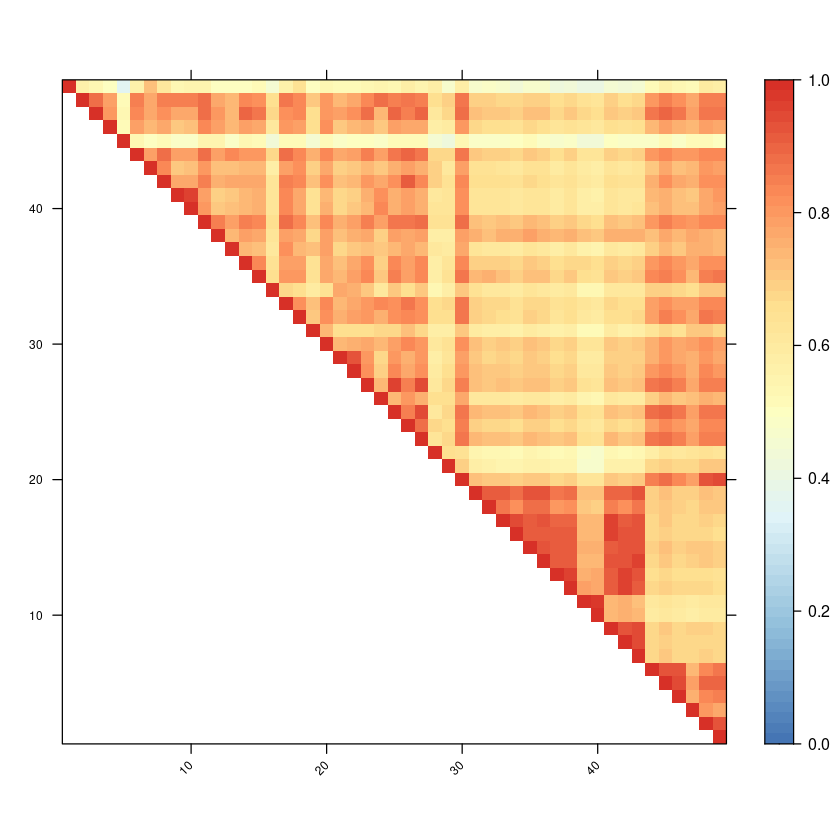

In [40]:
plot_sharing(g1$U$XtX)

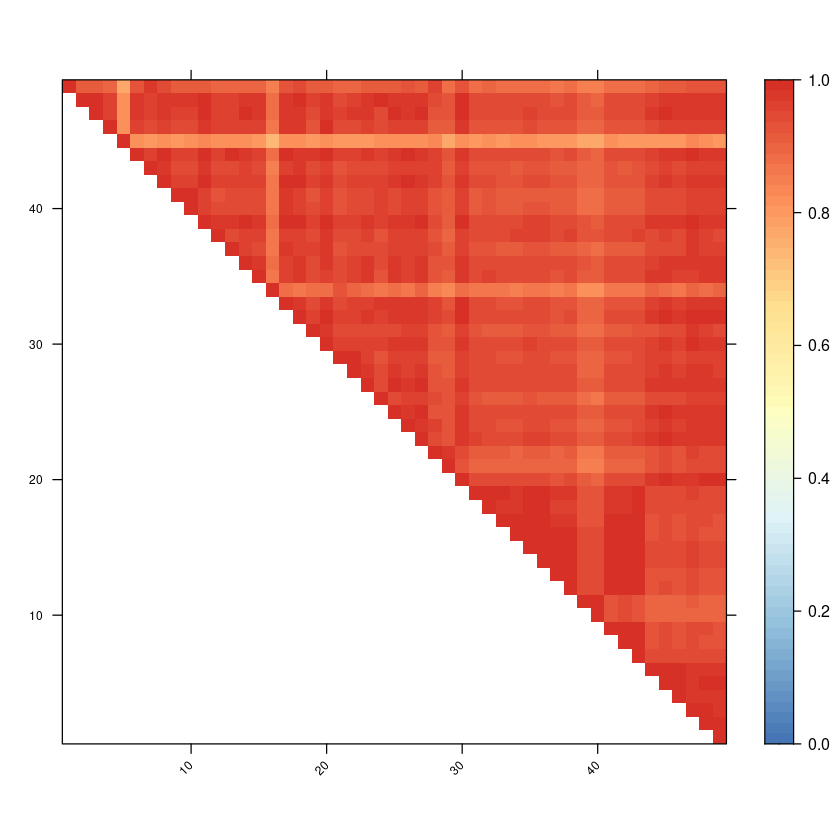

In [41]:
plot_sharing(g1$U$tFLASH_udv_si)

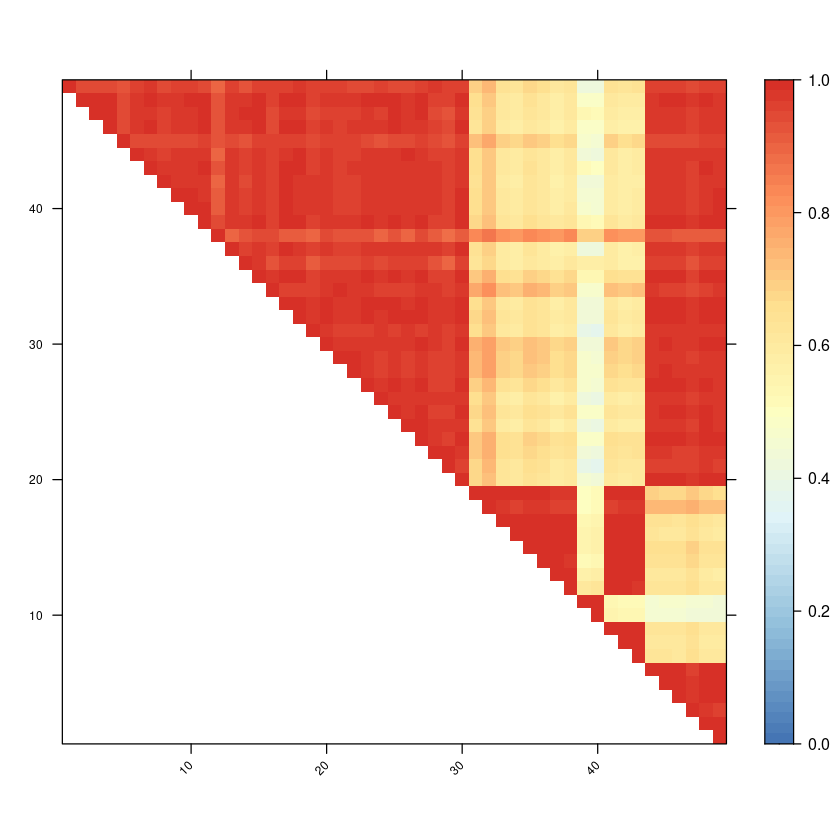

In [42]:
plot_sharing(g1$U$tFLASH_nonneg)

## Data-driven prior via TEEM

In [44]:
a2 = dat$artificial_mixture_50$TEEM
a2$loglik[length(a2$loglik)]

[1] -2379391

In [45]:
tmp = data.frame(names(a2$U), a2$w)
head(tmp [order(tmp[,2], decreasing = T),])

,names.a2.U.,a2.w
,<fct>,<dbl>
tFLASH_nonneg,tFLASH_nonneg,0.21938039
XtX,XtX,0.20739617
tFLASH_udv_si,tFLASH_udv_si,0.18349602
FLASH_udv_si_4,FLASH_udv_si_4,0.12475288
tPCA,tPCA,0.07414179
FLASH_nonneg_3,FLASH_nonneg_3,0.06708584


In [46]:
comp = names(a2$U)[which(a2$w>tol)]
print(comp)
print(length(comp))

 [1] "XtX"             "tFLASH_udv_si"   "FLASH_udv_si_1"  "FLASH_udv_si_2" 
 [5] "FLASH_udv_si_3"  "FLASH_udv_si_4"  "FLASH_udv_si_5"  "FLASH_udv_si_6" 
 [9] "FLASH_udv_si_7"  "FLASH_udv_si_8"  "FLASH_udv_si_9"  "FLASH_udv_si_10"
[13] "FLASH_udv_si_11" "FLASH_udv_si_12" "FLASH_udv_si_13" "FLASH_udv_si_14"
[17] "FLASH_udv_si_15" "FLASH_udv_si_16" "FLASH_udv_si_17" "FLASH_udv_si_18"
[21] "FLASH_udv_si_19" "FLASH_udv_si_20" "FLASH_udv_si_21" "FLASH_udv_si_22"
[25] "FLASH_udv_si_23" "FLASH_udv_si_24" "FLASH_udv_si_25" "FLASH_udv_si_26"
[29] "FLASH_udv_si_27" "FLASH_udv_si_28" "FLASH_udv_si_29" "FLASH_udv_si_30"
[33] "FLASH_udv_si_31" "FLASH_udv_si_32" "FLASH_udv_si_33" "FLASH_udv_si_34"
[37] "FLASH_udv_si_35" "FLASH_udv_si_36" "FLASH_udv_si_37" "FLASH_udv_si_38"
[41] "FLASH_udv_si_39" "FLASH_udv_si_40" "FLASH_udv_si_41" "FLASH_udv_si_42"
[45] "FLASH_udv_si_43" "FLASH_udv_si_44" "FLASH_udv_si_45" "FLASH_udv_si_46"
[49] "FLASH_udv_si_47" "FLASH_udv_si_48" "FLASH_udv_si_49" "FLASH_udv_si_50"

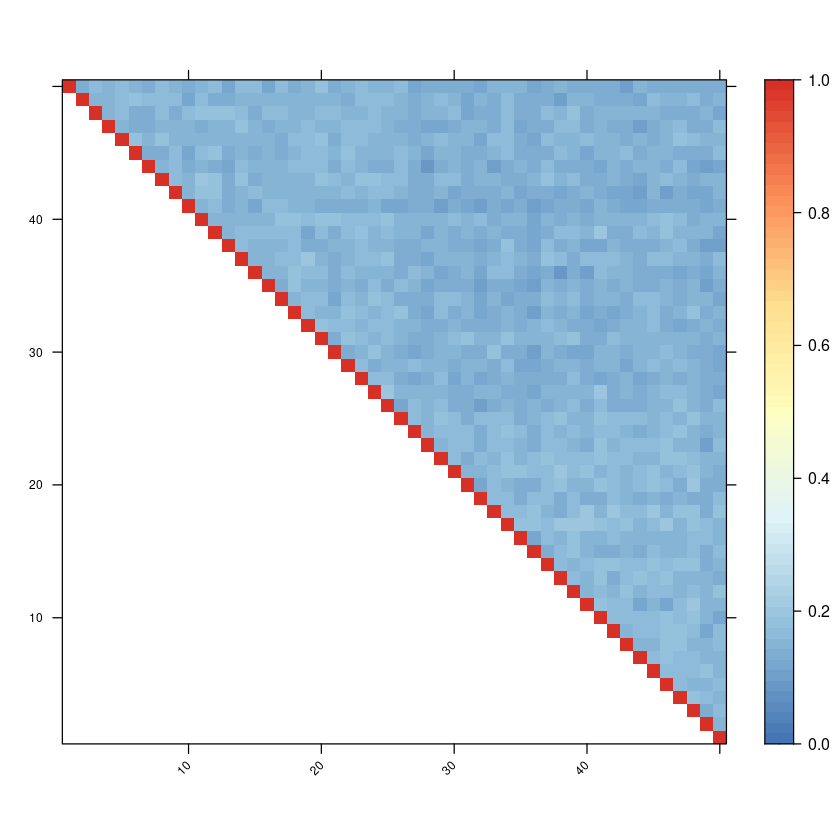

In [47]:
plot_sharing(a2$U$XtX)

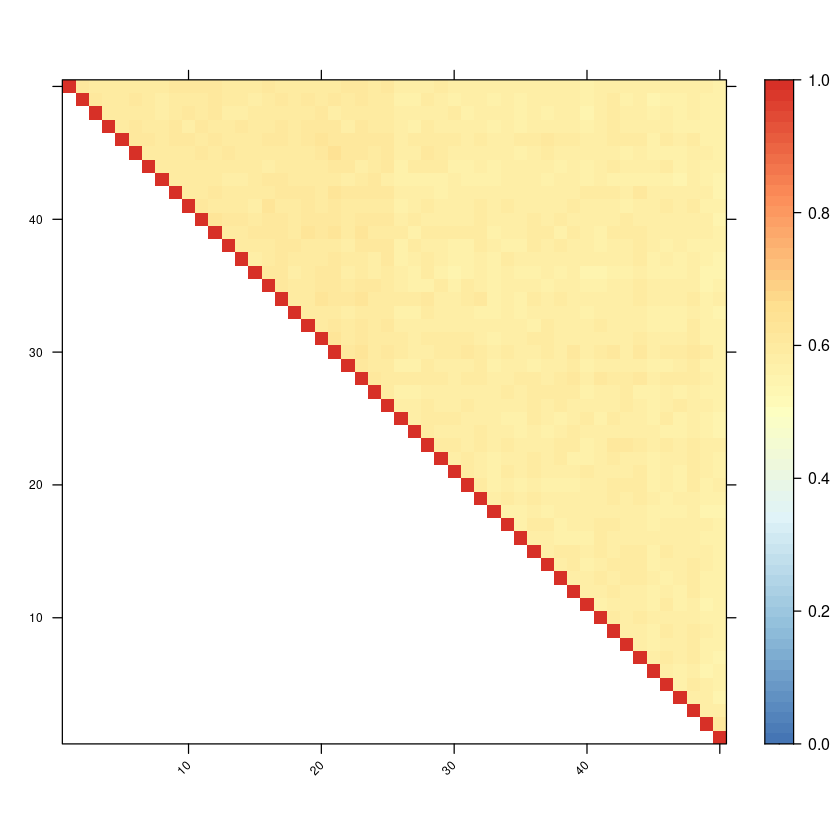

In [48]:
plot_sharing(a2$U$tFLASH_udv_si)

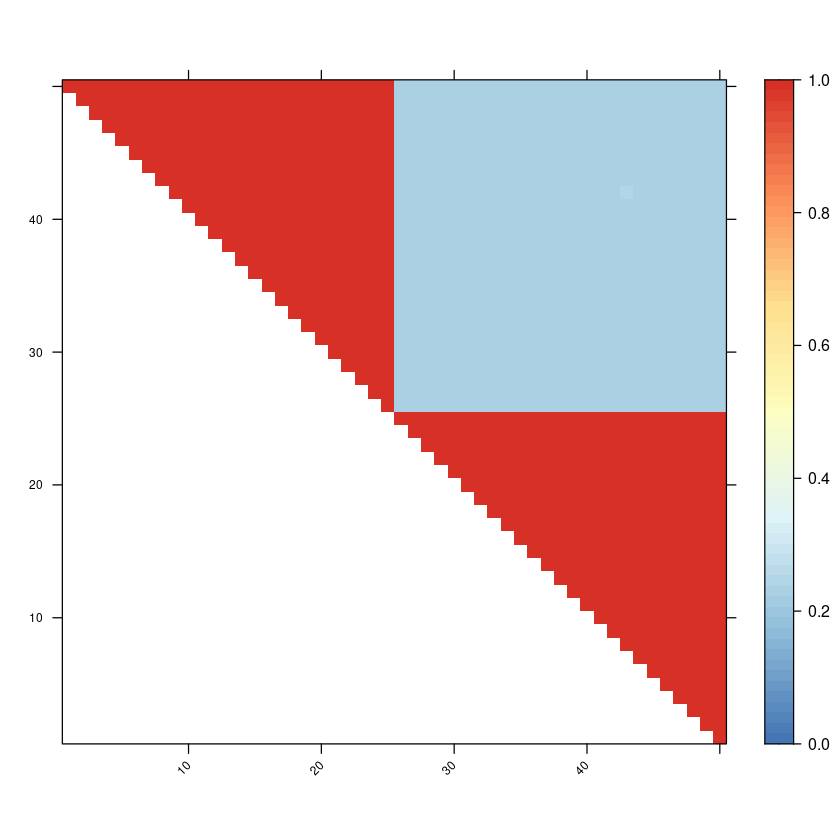

In [49]:
plot_sharing(a2$U$tFLASH_nonneg)

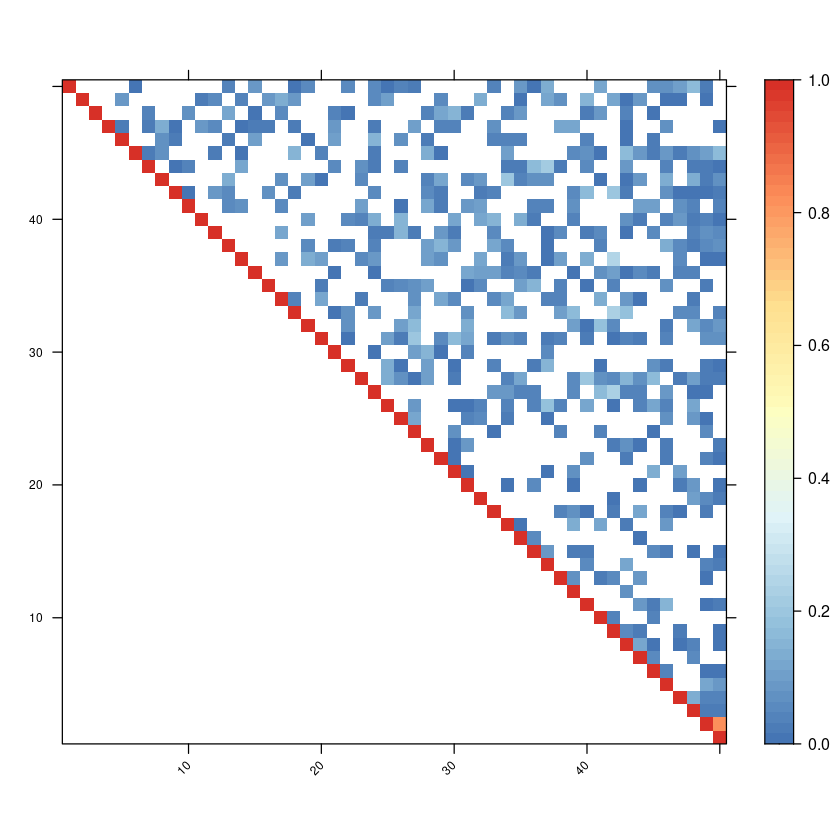

In [51]:
plot_sharing(a2$U$FLASH_udv_si_4)

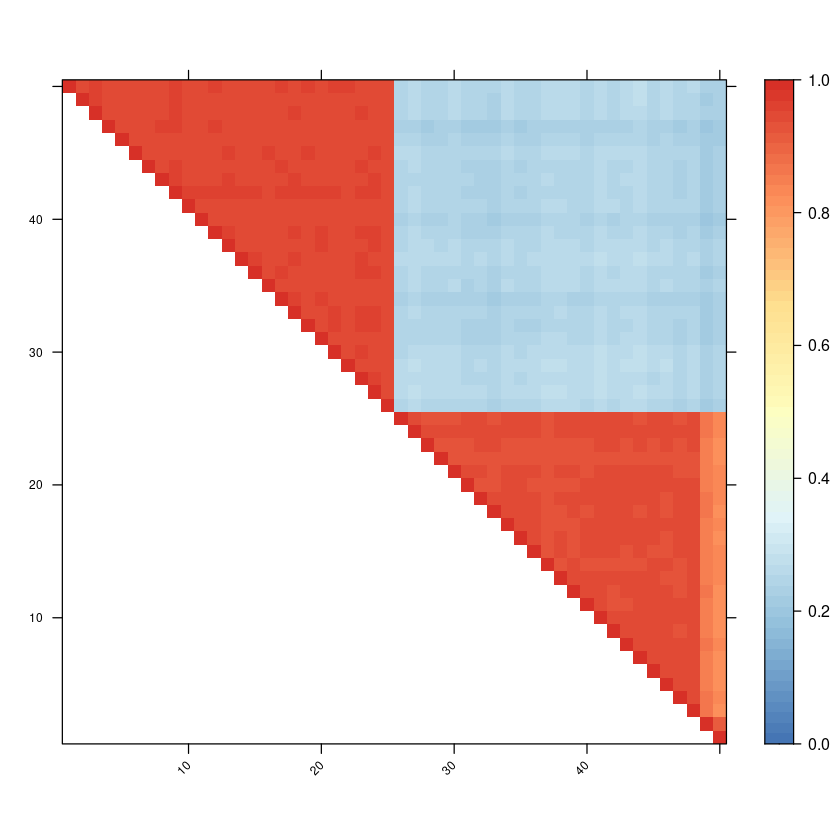

In [52]:
plot_sharing(a2$U$tPCA)

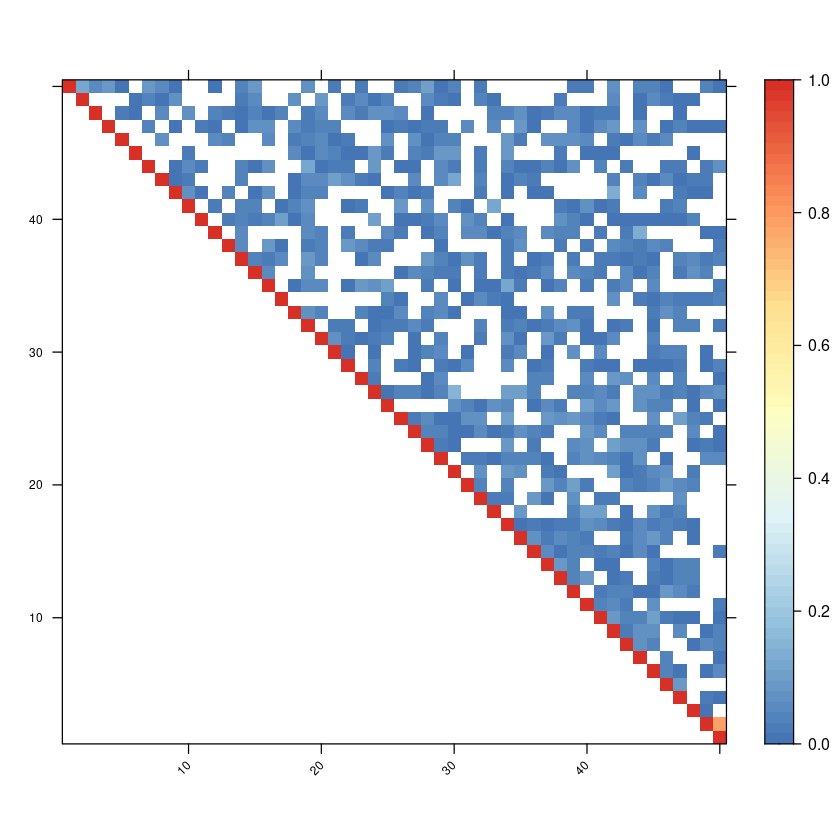

In [53]:
plot_sharing(a2$U$FLASH_nonneg_3)

In [54]:
g2 = dat$gtex_mixture$TEEM
g2$loglik[length(g2$loglik)]

[1] -2394703

In [55]:
tmp = data.frame(names(g2$U), g2$w)
head(tmp [order(tmp[,2], decreasing = T),])

,names.g2.U.,g2.w
,<fct>,<dbl>
tFLASH_nonneg,tFLASH_nonneg,0.382351726
tPCA,tPCA,0.336625869
XtX,XtX,0.154904241
tFLASH_udv_si,tFLASH_udv_si,0.089914561
FLASH_nonneg_4,FLASH_nonneg_4,0.009195117
FLASH_nonneg_15,FLASH_nonneg_15,0.005237467


In [56]:
comp = names(g2$U)[which(g2$w>tol)]
print(comp)
print(length(comp))

 [1] "XtX"             "tFLASH_udv_si"   "FLASH_udv_si_1"  "FLASH_udv_si_2" 
 [5] "FLASH_udv_si_3"  "FLASH_udv_si_4"  "FLASH_udv_si_5"  "FLASH_udv_si_6" 
 [9] "FLASH_udv_si_7"  "FLASH_udv_si_8"  "FLASH_udv_si_9"  "FLASH_udv_si_10"
[13] "FLASH_udv_si_11" "FLASH_udv_si_12" "FLASH_udv_si_13" "FLASH_udv_si_14"
[17] "FLASH_udv_si_15" "FLASH_udv_si_16" "FLASH_udv_si_17" "FLASH_udv_si_18"
[21] "FLASH_udv_si_19" "FLASH_udv_si_20" "FLASH_udv_si_21" "tFLASH_nonneg"  
[25] "FLASH_nonneg_1"  "FLASH_nonneg_2"  "FLASH_nonneg_3"  "FLASH_nonneg_4" 
[29] "FLASH_nonneg_5"  "FLASH_nonneg_6"  "FLASH_nonneg_7"  "FLASH_nonneg_8" 
[33] "FLASH_nonneg_9"  "FLASH_nonneg_10" "FLASH_nonneg_11" "FLASH_nonneg_12"
[37] "FLASH_nonneg_13" "FLASH_nonneg_14" "FLASH_nonneg_15" "FLASH_nonneg_16"
[41] "FLASH_nonneg_17" "FLASH_nonneg_18" "FLASH_nonneg_19" "FLASH_nonneg_20"
[45] "FLASH_nonneg_21" "PCA_1"           "PCA_2"           "PCA_3"          
[49] "tPCA"           
[1] 49


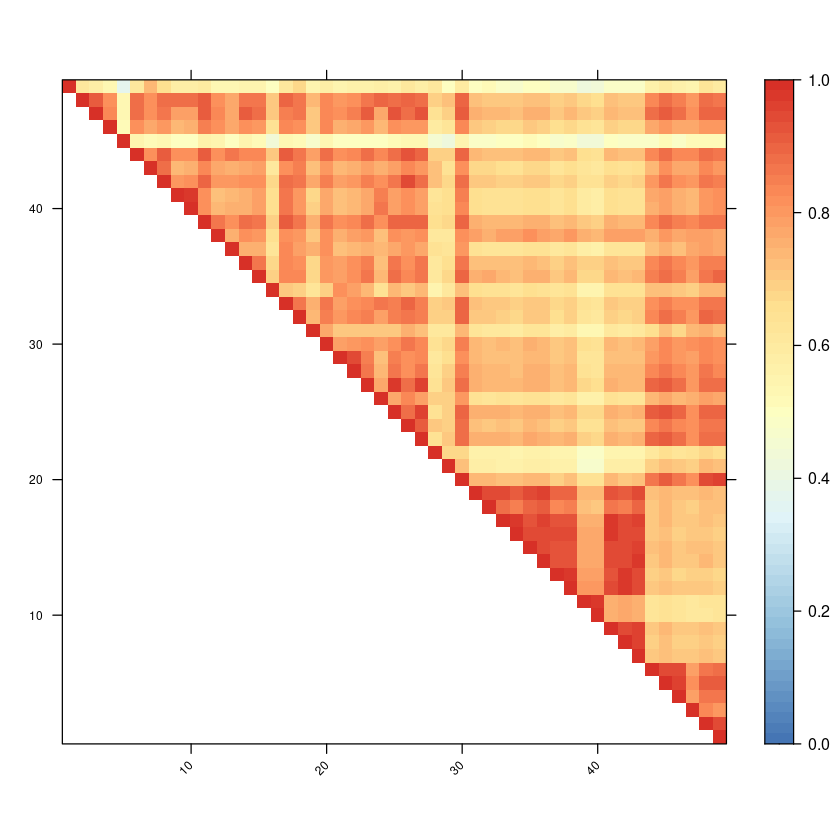

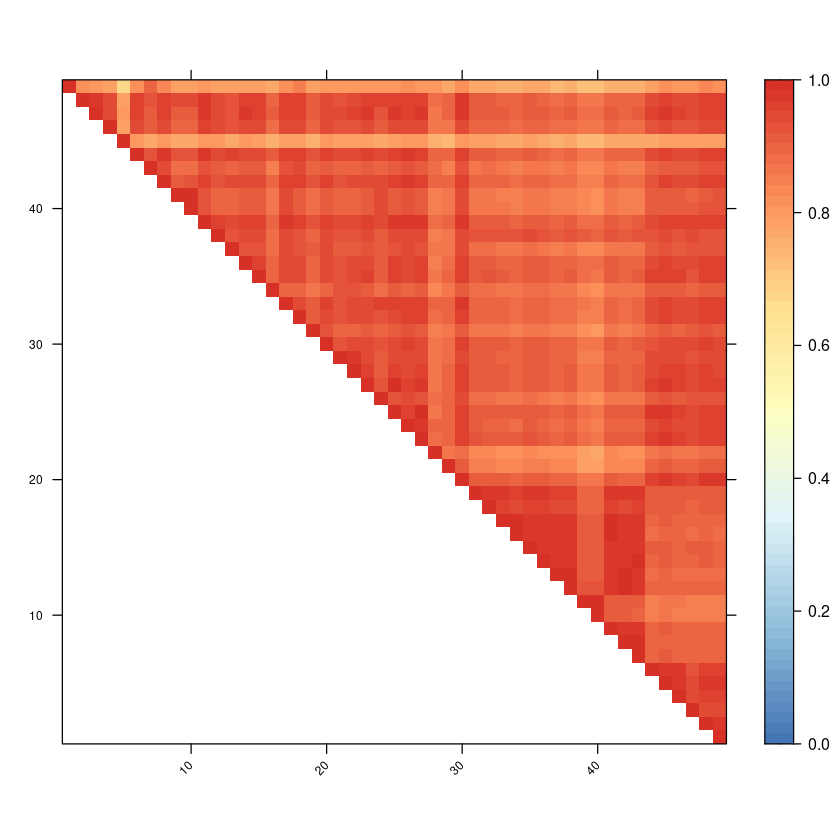

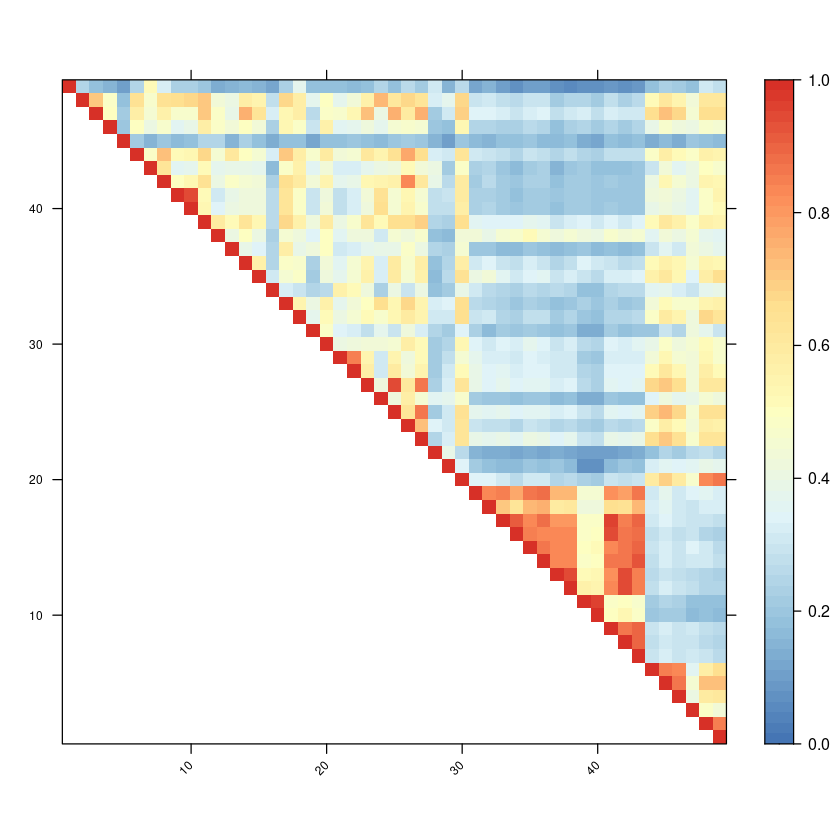

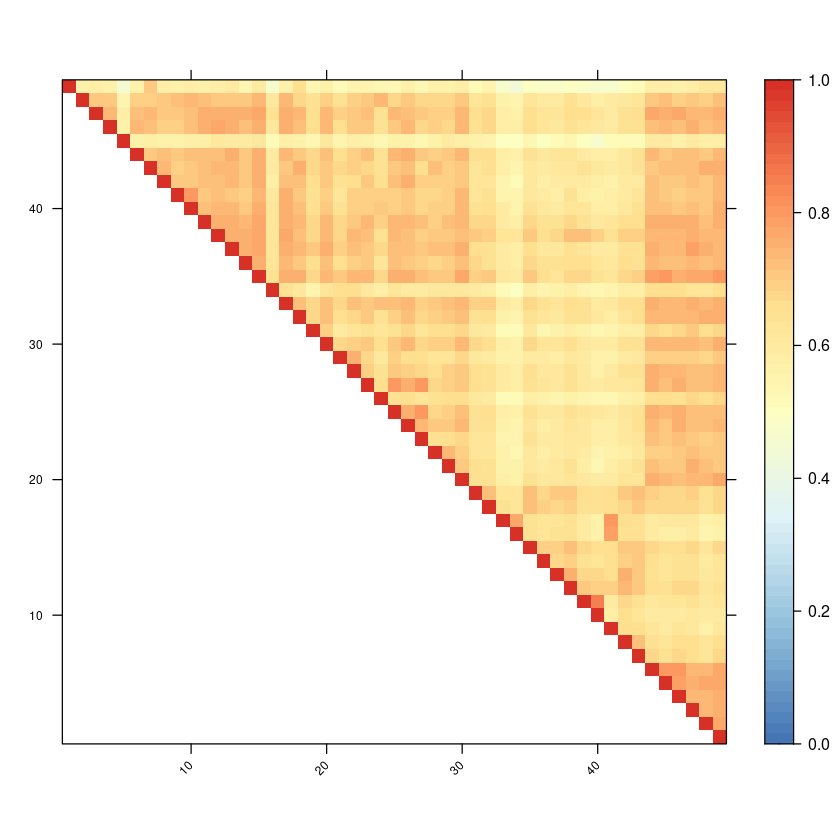

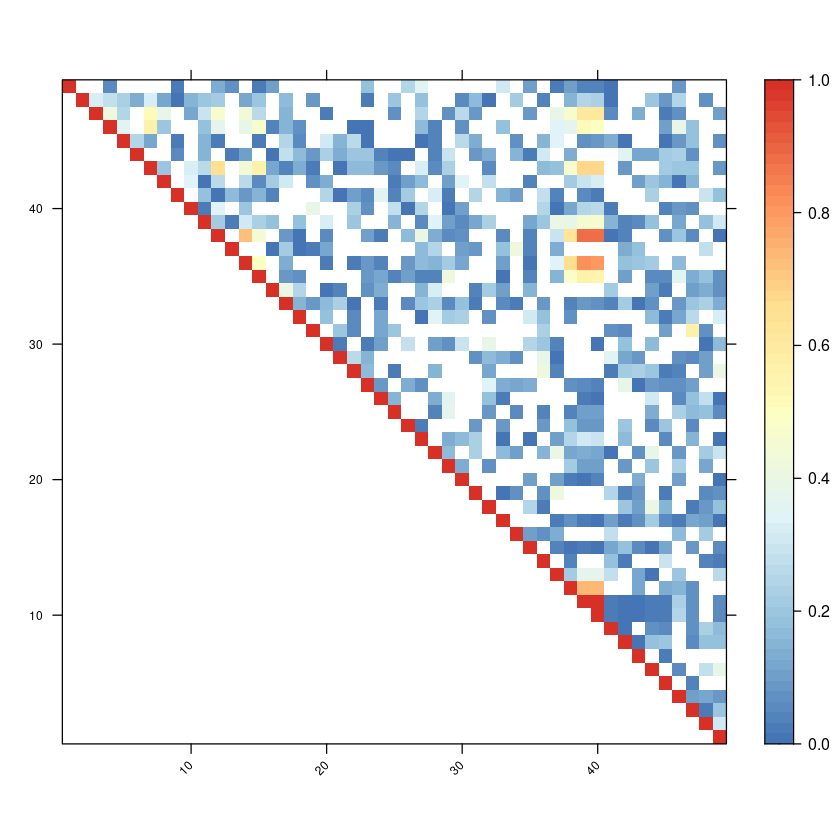

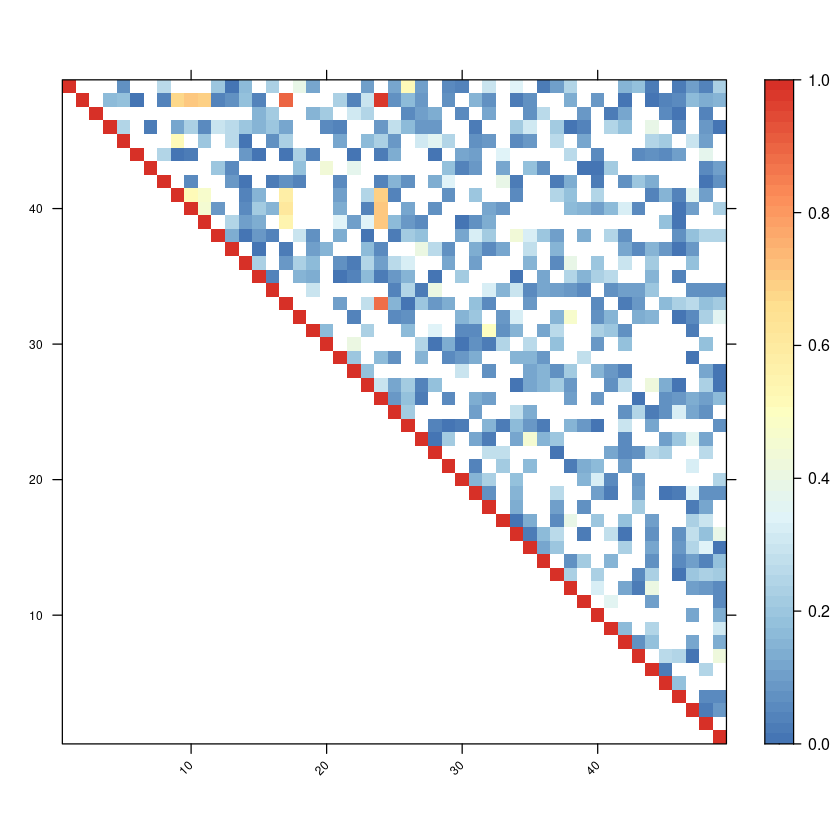

In [58]:
plot_sharing(g2$U$tFLASH_nonneg)
plot_sharing(g2$U$tPCA)
plot_sharing(g2$U$XtX)
plot_sharing(g2$U$tFLASH_udv_si)
plot_sharing(g2$U$FLASH_nonneg_4)
plot_sharing(g2$U$FLASH_nonneg_15)